# Data Science Certification: 
## "Analyse and predict factors related to readmission as well as other outcomes pertaining to patients with diabetes."

### The dataset 

You will be working with the [readmission data](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). Management of hyperglycemia in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. In this dataset you will need to see what the impact of various clinical practices is readmission rates.

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission).
- It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- The length of stay was at least 1 day and \at most 14 days.
- Laboratory tests were performed during the encounter.
- Medications were administered during the encounter.

The data contains attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, emergency visits in the year before the hospitalization and many others.

### The goal 

Your goal is to pre-process, analyse, visualise, and conduct unsupervised and supervised learning on this input dataset. The final outcome is a classifier that is able to predict a patient's readmission. In order to demonstrate that your solution is optimal, you will need to also include your exploratory analyses of the dataset, conduct thorough validation and parameter optimisations. You should also feel free to explore new algorithms and to use publicly available resources and solutions such as those listed on the dataset webpage as a reference (see the bottom of this page for the link).
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

You will be evaluated and given feedback on:
- Your problem-solving approach.
- Your code.
- The justifications you give for your decisions.
- The quality and performance of your solution.
- The presentation of your solution.

<span style="color:red">***Reviewer Comments, January 2017*** </span>

**Overall-problem solving approach:**
- (+) Good to investigate the number of unique elements per column to get better understanding of the dataset you are dealing with. 
- (+) A great background investigation of the dataset.
- (+) Treat the missing values and convert categorical and numerical variables to correct type.
- (+) Some attributes only have one unique value, which in these cases you dropped the attribute.
- (-) No further justifications on why you decided to remove 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_2', 'diag_3'. 
- (+) Good to remove data where patients dead or discharged.
- (+) Good that you convert the range values such as age and weight to the mean value of the range.
- (+) Treat the problem as binary classification, by merging No and >30 to one.
- (-) No need to normalize one-hot encoding features – only numerical
- (-) For more user-friendly code, the one-hot encoding could have been done is for-loop, where all categorical variables are extracted in same cell.
- (+) Good use of functions such as mean_time (data).
- (+) Good use of heatmap to calculate the correlation between features. Also, commentary on the heatmap is great.
- (+) Apply dimensionality reduction using PCA and good clarification on why you did use PCA.
- (+) Use sns and heatmap for visualization
-  (-) No use of histograms to plot the distribution of the variables.
- (+) Use K-means clustering
- (-) You didn't looked at the frequency of the labels, readmitted=0 is majority class and by applying supervised learning algorithm with imbalanced dataset could lead to weak classifier. 
- (+) Split the data into training and test
- (+) Use KNN classifier with 10-fold cross validation. 
- (-) Did apply grid search to optimize the algorithm.
- (-) Instead of doing yPredKNN.sum() you could use classification_report and confusion_matrix, to look at more evaluation metrics, such as precision, recall, f1-score for every class. 
- (+) good summarization


**Quality of the code:**

- (+) Creating functions for re-usability
- (+) Python comments were sometimes used to describe the steps of the analysis.
- (+) Good use of DataFrame and Numpy to isolate numeric and nominal features.
- (+) Variety of plots such as bar plots, sns, heatmaps were used.




**Overall comments:**

Overall, a good solution where the pre-processing, visualization and model selection was good. Well commented code and good justification of your decisions. 
Did you think about sampling the dataset to have more balanced classes? Next step could be to investigate the classes balance, [article](http://www.svds.com/learning-imbalanced-classes/?utm_source=kdnuggets&utm_medium=blog&utm_campaign=learning%20from%20imbalanced%20classes) is great, where it states different methods of sampling the dataset. Further investigation would be to use other classifiers such as random forest, SVM, Adaboost etc.  Very user-friendly notebook with good summary and overview of your project.   

## Step 1: Load the libraries

Libraries to consider:
- Powerful Python libraries for data manipulation and arrays: e.g. scipy, pandas, numpy
- Plotting libraries: e.g. matplotlib, seaborn, Plotly or ggplot (R library supported in Python)
- Machine Learning libraries: e.g. sklearn 

In [3]:
# Data manipulation and arrays
import scipy
import numpy as np
import pandas as pd

rng = np.random.RandomState(1)

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

# Additional plotting functionality 
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

%matplotlib inline

# Machine learning methods for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine learning methods for unsupervised learning
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Machine learning methods for principal component analysis
from sklearn.decomposition import PCA

# Machine learning methods for supervised learning
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

init_notebook_mode()

print("libraries all imported, ready to go")

libraries all imported, ready to go


As a next step, you will need to import the content of the provided `diabetic_data.csv` file, taking into account that missing values are represented by **"?"** (Hint: check the documentation for the `na_values` attribute of the `read_csv()` function). In addition, you may wish to provide an input for the `index_col` attribute and also set `low_memory=False` if you get a relevant warning. 

Perform "sanity" checks:

- Print the contents of your input data in-line or in a tabular format
- Check the dimensionality of your data (you can cross-check with the numbers on the UCl website) 
- Check and detect any format issues, missing values or anomalies. 
- Find the number of unique elements per column and the type of data that these columns contain (categorical, numeric, etc.) 
- Generate various summary statistics per column (for instance by using the `describe()` function) 

In all cases, report your findings.

In [4]:
diabdata = pd.read_csv('./dataset_diabetes/diabetic_data.csv')
pd.set_option('display.max_columns', None)
diabdata.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Checking the dimensionality of the data.

In [5]:
print(diabdata.shape)

(101766, 50)


This does not correspond exactly with the dimensionality in the UCI abstract (100000,55) but does match the .csv file that was downloaded.  Reason for the mismatch is unknown, but there don't seem to be any essential missing columns.

Number of unique values in each column:

In [9]:
diabdata.apply(pd.Series.nunique)

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

What are the unique values in each column?

Analysing the unique values for each column:

In [14]:
diabdata['encounter_id'].value_counts()

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, dtype: int64

In [15]:
diabdata['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, dtype

In [11]:
diabdata['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [12]:
diabdata['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [13]:
diabdata['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [16]:
diabdata['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [17]:
diabdata['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

Importing the admission type id mapping file (derived from the general mapping file, IDs_mapping.csv):

In [7]:
admission_type_id_mapping = pd.read_csv('./dataset_diabetes/admission_type_id_mapping.csv')
pd.set_option('display.max_columns', None)
admission_type_id_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [23]:
diabdata['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

Importing the discharge disposition id mapping file (derived from the general mapping file, IDs_mapping.csv):

In [6]:
discharge_disposition_id_mapping = pd.read_csv('./dataset_diabetes/discharge_disposition_id_mapping.csv')
pd.set_option('display.max_columns', None)
discharge_disposition_id_mapping

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [25]:
diabdata['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

Importing the discharge disposition id mapping file (derived from the general mapping file, IDs_mapping.csv):

In [8]:
admission_source_id_mapping = pd.read_csv('./dataset_diabetes/admission_source_id_mapping.csv')
pd.set_option('display.max_columns', None)
admission_source_id_mapping

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [27]:
diabdata['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [28]:
diabdata['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [29]:
diabdata['medical_specialty'].value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [30]:
diabdata['num_lab_procedures'].value_counts()

1      3208
43     2804
44     2496
45     2376
38     2213
40     2201
46     2189
41     2117
42     2113
47     2106
39     2101
37     2079
49     2066
48     2058
36     1962
51     1925
50     1924
35     1907
54     1888
56     1839
52     1838
55     1836
53     1802
57     1747
58     1708
34     1677
61     1638
59     1624
60     1610
63     1450
       ... 
89       73
90       65
91       61
93       56
92       48
95       46
94       45
97       31
96       28
98       26
101      13
100      13
99        9
102       8
103       6
105       6
106       5
109       4
108       4
111       3
113       3
104       3
114       2
126       1
132       1
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, dtype: int64

In [31]:
diabdata['num_procedures'].value_counts()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

In [32]:
diabdata['num_medications'].value_counts()

13    6086
12    6004
11    5795
15    5792
14    5707
16    5430
10    5346
17    4919
9     4913
18    4523
8     4353
19    4078
20    3691
7     3484
21    3230
22    2868
6     2699
23    2426
24    2109
5     2017
25    1888
26    1608
27    1432
4     1417
28    1233
29    1000
3      900
30     849
31     712
32     623
      ... 
45      88
47      74
49      61
48      60
50      55
52      54
51      43
53      40
56      37
54      33
55      32
57      26
58      25
60      23
59      20
62      15
63      14
61      14
65      12
64       8
68       7
67       7
69       5
66       5
72       3
70       2
75       2
74       1
79       1
81       1
Name: num_medications, dtype: int64

In [33]:
diabdata['number_outpatient'].value_counts()

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [34]:
diabdata['number_emergency'].value_counts()

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [35]:
diabdata['number_inpatient'].value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [36]:
diabdata['diag_1'].value_counts()

428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
          ... 
84           1
57           1
791          1
832          1
318          1
365          1
523          1
649          1
133          1
363          1
160          1
114          1
957          1
955          1
885          1
10           1
804          1
E909         1
837          1
V07          1
412          1
870          1
839          1
V70          1
637          1
838          1
982          1
834          1
817          1
314          1
Name: diag_1, dtype: int64

In [37]:
diabdata['diag_2'].value_counts()

276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
250.02    2074
707       1999
585       1871
584       1649
491       1545
250.01    1523
285       1520
780       1491
425       1434
682       1433
486       1379
518       1355
424       1071
413       1042
250.6      895
493        881
305        702
786        644
280        606
998        571
          ... 
353          1
350          1
140          1
145          1
V60          1
232          1
235          1
V69          1
325          1
523          1
927          1
832          1
843          1
948          1
947          1
846          1
944          1
912          1
917          1
915          1
674          1
670          1
212          1
942          1
580          1
E890         1
E929         1
529          1
833          1
270          1
Name: diag_2, dtype: int64

In [38]:
diabdata['diag_3'].value_counts()

250       11555
401        8289
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
?          1423
V45        1389
250.02     1369
707        1360
780        1334
285        1200
425        1136
250.6      1080
424        1063
584         963
305         924
250.01      915
682         887
518         854
41          727
493         694
278         680
530         625
786         584
          ...  
370           1
E876          1
755           1
863           1
542           1
E949          1
540           1
186           1
226           1
970           1
971           1
972           1
E922          1
361           1
27            1
57            1
538           1
853           1
158           1
811           1
671           1
524           1
193           1
195           1
674           1
E955          1
893           1
E892          1
236           1
E886          1
Name: diag_3, dtype: int

In [39]:
diabdata['number_diagnoses'].value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [40]:
diabdata['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [41]:
diabdata['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [43]:
diabdata['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [44]:
diabdata['repaglinide'].value_counts()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [45]:
diabdata['nateglinide'].value_counts()

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

In [46]:
diabdata['chlorpropamide'].value_counts()

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

In [47]:
diabdata['glimepiride'].value_counts()

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

In [48]:
diabdata['acetohexamide'].value_counts()

No        101765
Steady         1
Name: acetohexamide, dtype: int64

In [49]:
diabdata['glipizide'].value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [50]:
diabdata['glyburide'].value_counts()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

In [51]:
diabdata['tolbutamide'].value_counts()

No        101743
Steady        23
Name: tolbutamide, dtype: int64

In [52]:
diabdata['pioglitazone'].value_counts()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [53]:
diabdata['rosiglitazone'].value_counts()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

In [54]:
diabdata['acarbose'].value_counts()

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

In [55]:
diabdata['miglitol'].value_counts()

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

In [56]:
diabdata['troglitazone'].value_counts()

No        101763
Steady         3
Name: troglitazone, dtype: int64

In [57]:
diabdata['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [58]:
diabdata['citoglipton'].value_counts()

No    101766
Name: citoglipton, dtype: int64

In [59]:
diabdata['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [60]:
diabdata['glyburide-metformin'].value_counts()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64

In [61]:
diabdata['glipizide-metformin'].value_counts()

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

In [62]:
diabdata['glimepiride-pioglitazone'].value_counts()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

In [63]:
diabdata['metformin-rosiglitazone'].value_counts()

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [64]:
diabdata['metformin-pioglitazone'].value_counts()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [65]:
diabdata['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [66]:
diabdata['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [67]:
diabdata['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


### Data assessment and potential issues arising

Approach to data analysis:

The data is highly complex and it would seem that the best way forward is to have a clear goal in mind with regards to analysis, which may allow some of the attributes to be simplified or discarded and some of the rows to be omitted.  It would also increase the likelihood of a valuable conclusion to be reached.

The original analysis done in the paper associated with this dataset, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records", was focused on how readmission rates varied with HbA1c measurement and consequent treatment.  It would seem reasonable to build on that research and create hypotheses to test which relate to that one.

Some of the results from that paper were astounding, namely that for a respiratory primary diagnoses, higher measurements of HbA1c (above 8%), with unchanged medication, tended to result in a lower rate of readmission (within 30 days).  Furthermore, for three of the four top primary diagnoses (circulatory, respiratory and diabetic), changed medication resulted in a HIGHER probability of readmission than unchanged medication (in cases where HbA1c was above 8%).

Possible reasons for the latter anomaly:

- Drug dosages tended to be changed only as a last resort, where patients were extremely ill and were therefore more likely to be readmitted.

- Certain drugs actually had a delayed negative effect and an increased dosage tended to cause re-admission.

- In the case that HbA1c was high, doctors often judged (incorrectly) that the current medication was ineffective and reduced the dosage, causing a delayed negative effect.

It might therefore be interesting and useful shift focus slightly and examine the relationship of medication with various drugs, and change in that medication, to hospital readmission.  The most extreme trend was seen in the cases where the primary diagnosis was circulatory.  Also circulatory primary diagnoses were by far the most prevalent (in the modified dataset used in the paper).  It is therefore proposed that we filter out all other primary diagnoses.  This may help to filter out confounding factors as we will be looking at the specifically at one type of illness, which may tend to be treated in certain ways and react to specific drugs, for better or worse.

There is a danger of confounding variables such as the seriousness of disease.  Not only (as above) may the seriousness of disease be correlated with the likelihood of changed medication, but it may be that increases in certain medications are prescribed more often for serious levels of diabetes and may therefore ("unfairly") correlate with increased levels of readmission.  To determine whether there are confounding variables is beyond the scope of this project but this may need to be addressed in future research.

General issues with data and suggested fixes:

1) The data is complex.  To simplify matters, it is proposed that all attributes that are not directly controllable by the medical establishment are removed as being irrelevant to the forming of any recommendations on procedure and, furthermore, being unlikely to be correlated with drug administration and consequently a potentially confounding variable.  Columns to be removed: 'race', 'gender', 'number_outpatient', 'number_emergency' 'number_inpatient', 'weight', 'admission_type', 'admission_source', 'payer_code' and 'medical_specialty'.

2) As an exception to the changes specified in 1), we will retain 'age' and 'time in hospital' as markers of seriousness of illness, which is a suspected confounding factor, as discussed above.

3) Certain drug columns have almost always a single value and can therefore also be ignored as they will not contribute significantly to any predictive model.  Columns which have a value other than zero in 100 or fewer rows are:

- metformin-pioglitazone
- metformin-rosiglitazone
- glimepiride-pioglitazone
- glipizide-metformin
- citoglipton
- examide
- troglitazone
- miglitol
- tolbutamide
- acetohexamide
- chloropropamide

These will be ignored.

4) 'change' and 'diabetesMed' are redundant variables covered by the drug administration data and can safely be removed.

5) To further simplify, we will also remove the following columns: 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_2', 'diag_3'.

6) 'A1cresult' will be retained as a column as a further marker of the seriousness of illness. 'max_glu_serum' will be discarded as redundant and because that test was only done in 5% of cases.

7) To simplify, 'diag_1' will be removed as a column once the data has being filtered to include only circulatory diagnoses.  We are not interested in the subdiagnoses.

8) In the original paper, only the first hospital visit for each patient was retained in the data.  So that each row would be "independent".  It is not clear that this filtering is absolutely necessary so it will not be done.  Also patients who died or were discharged to hospices were removed from the data (presumably because these patients would not be readmitted, but for a "bad" reason, thus potentially skewing the results). This seems a very valid thing to do but for simplicity will not be done here.

Format issues:

1) Age is registered as decade rather than year.  It is suggested that the decade range value be replaced by its middle year.

2) The 'readmitted' column needs to be made boolean.  It is proposed that "NO" and ">30" are interpreted as "0" and "<30" as "1", according to the rationale in the original paper.

3) 'A1cresult' classes need to be replaced with numerical estimates. "Norm" will be replaced by "3" (approximately the central value of [0,7]), ">7" by "7"(the central value of (7,8] rounded down) and ">8" by "10" (which is an estimate of the mean of the probablility distribution of values that are greater than 8). The estimates have been kept as integers for simplicity. "None" will be replaced by a (slightly) arbitrary estimate of "7".  An extra column will be set up to flag if the A1cresult was done or not.  This will enable us to filter for that if necessary.

4) We will one-hot encode each drug column.  Another option would be to use the drug columns to estimate the resultant dose of each drug.  But one-hot encoding will be used in order to detect not only whether administration of each drug is effective but also whether change-up and or change-down is causing readmission.

5) Several columns will need to be scaled and normalised to match the boolean columns.

All values in the cleaned and streamlined table will then be boolean or int64 (as can be seen from the output of "unique", detailed above).

Missing values:

1) Missing values are prevalent in several of the attributes, namely 'weight', 'discharge_disposition', 'admission_type', 'admission_source', 'payer_code' and 'medical_specialty' It is proposed that we ignore those columns, at least in this preliminary enquiry.  (All of these, except 'discharge_disposition', we are already ignoring because they are not under the control of the medical establishment, as detailed above.)


Summary statistics:  We will look now at certain summary statistics in the raw columns that we are retaining.

Average time in hospital:

In [10]:
av_time = diabdata['time_in_hospital'].mean()
av_time

4.395986871843248

Bar chart of the distribution of time in hospital:

In [21]:
time_distrib = diabdata['time_in_hospital'].value_counts()
time_distrib

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

Bar chart of the distribution of age:

In [12]:
age_distrib = diabdata['age'].value_counts()
age_distrib

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Creating this as a dataframe:

In [15]:
age_grouped = diabdata.groupby('age')

In [17]:
def total_encounters(data):
    total_encounters   = data['age'].count()
    return pd.Series({'total_encounters': total_encounters})

In [19]:
age_group_encounters = age_grouped.apply(total_encounters)
age_group_encounters = age_group_encounters.reset_index()
age_group_encounters

,age,total_encounters
0,[0-10),161
1,[10-20),691
2,[20-30),1657
3,[30-40),3775
4,[40-50),9685
5,[50-60),17256
6,[60-70),22483
7,[70-80),26068
8,[80-90),17197
9,[90-100),2793


Plotting this as a bar chart:

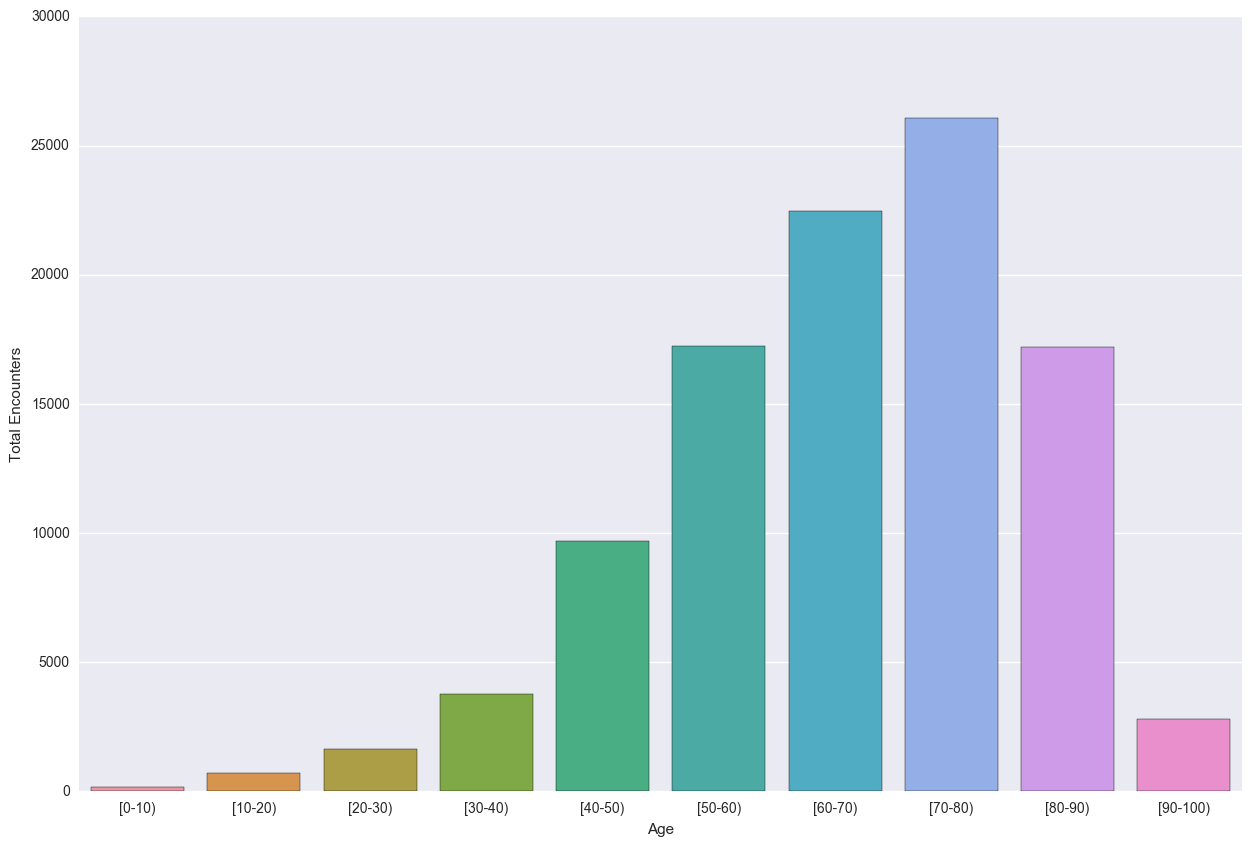

In [20]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='age', y='total_encounters', data=age_group_encounters)
ax.set(xlabel='Age', ylabel='Total Encounters')
plt.show()

This graph makes total sense as diabetes prevalence increases with age but then there is a fall off at the top ages due to mortality.

Repeating this process, but with mean time in hospital as the dependent variable:

In [22]:
def mean_time(data):
    mean_time   = data['time_in_hospital'].mean()
    return pd.Series({'mean_time': mean_time})

In [23]:
age_group_mean_time = age_grouped.apply(mean_time)
age_group_mean_time = age_group_mean_time.reset_index()
age_group_mean_time

,age,mean_time
0,[0-10),2.546584
1,[10-20),3.191027
2,[20-30),3.564876
3,[30-40),3.799735
4,[40-50),4.039649
5,[50-60),4.125753
6,[60-70),4.382244
7,[70-80),4.590878
8,[80-90),4.808629
9,[90-100),4.755818


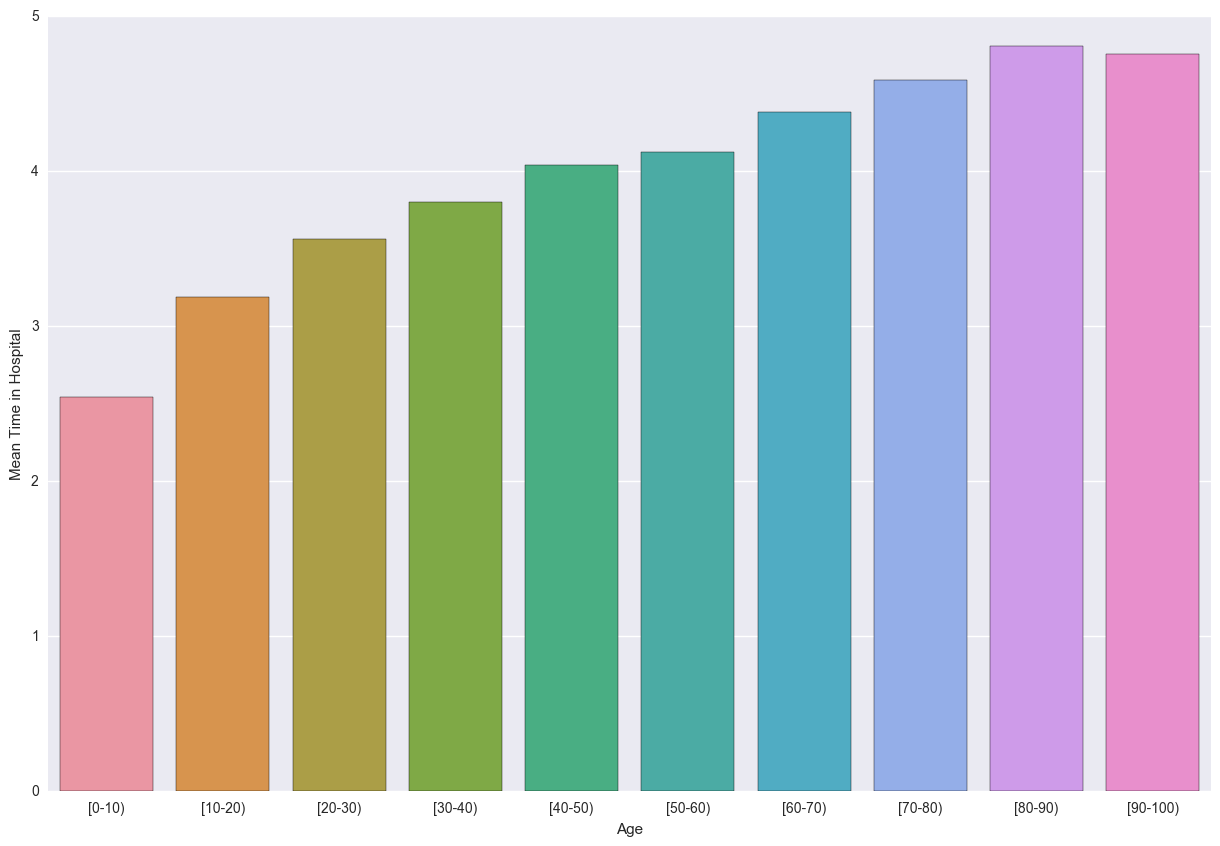

In [25]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='age', y='mean_time', data=age_group_mean_time)
ax.set(xlabel='Age', ylabel='Mean Time in Hospital')
plt.show()

No surprises here.  Mean time in hospital generally increases with age.  The dip in value for the age group [90-100) is explicable by increased mortality while in hospital and increased early discharge to hospice.

Anomalies and Outliers: There are no immediately apparent anomalies or outliers in the data.

## Step 2: Mine, pre-process and explore the data

Data mining and exploratory data analysis (EDA) is a crucial step in the ML model building process and is essential for verifying and improving the quality of the input data. Consider applying the following: 

- pre-processing: scale, normalise, transform the data if required
- decide how to handle categorical variables (e.g. one-hot encoding, label encoding), missing values (e.g. by removing rows or columns, imputation with zeros or centrality metrics) and outliers. Explain the reasoning behind the techniques and values of your choice. 
- dimensionality reduction or feature extraction: check for feature correlation and decide whether to apply dimensionality reduction and/or feature extraction (e.g. PCA).
- EDA and visualisation: explore and visualise the data then show your findings using a variety of plots such as scatterplots, barplots, boxplots, heatmaps.

Here we implement the strategy planned in Step 1. Firstly we remove the unwanted columns:

In [152]:
diabdata_col_drop = diabdata.drop(diabdata.columns[[0,1,2,3,5,6,7,8,10,11,12,13,14,15,16,17,19,20,21,29,32,36,37,39,40,43,44,45,46,47,48]], axis=1)
diabdata_col_drop.head()

,age,time_in_hospital,diag_1,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,readmitted
0,[0-10),1,250.83,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,[10-20),3,276,None,None,No,No,No,No,No,No,No,No,No,No,No,Up,No,>30
2,[20-30),2,648,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,NO
3,[30-40),2,8,None,None,No,No,No,No,No,No,No,No,No,No,No,Up,No,NO
4,[40-50),1,197,None,None,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,NO


This dataset will still be complex to handle once the one-hot encoding is performed, so we will amend the plan and restrict our interest to the five most popular drugs: metformin, glipizide, glyburide and insulin.  The 'diabetesMed' column is now needed again because several of the meds are no longer overed by their own column.

In [153]:
diabdata_col_drop = diabdata.drop(diabdata.columns[[0,1,2,3,5,6,7,8,10,11,12,13,14,15,16,17,19,20,21,22,25,26,27,28,29,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47]], axis=1)
diabdata_col_drop.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,[0-10),1,250.83,None,No,No,No,No,No,NO
1,[10-20),3,276,None,No,No,No,Up,Yes,>30
2,[20-30),2,648,None,No,Steady,No,No,Yes,NO
3,[30-40),2,8,None,No,No,No,Up,Yes,NO
4,[40-50),1,197,None,No,Steady,No,Steady,Yes,NO


Replacing the age intervals with estimated values:

In [154]:
diabdata_col_drop['age'] = diabdata_col_drop['age'].map({'[0-10)': 5, '[10-20)': 15,'[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})
diabdata_col_drop.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,No,NO
1,15,3,276,None,No,No,No,Up,Yes,>30
2,25,2,648,None,No,Steady,No,No,Yes,NO
3,35,2,8,None,No,No,No,Up,Yes,NO
4,45,1,197,None,No,Steady,No,Steady,Yes,NO


Replacing 'readmitted' with boolean values:

In [155]:
diabdata_col_drop['readmitted'] = diabdata_col_drop['readmitted'].map({'NO': 0, '>30': 0,'<30': 1})
diabdata_col_drop.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,No,0
1,15,3,276,None,No,No,No,Up,Yes,0
2,25,2,648,None,No,Steady,No,No,Yes,0
3,35,2,8,None,No,No,No,Up,Yes,0
4,45,1,197,None,No,Steady,No,Steady,Yes,0


Replacing 'diabetesMed' with boolean values:

In [156]:
diabdata_col_drop['diabetesMed'] = diabdata_col_drop['diabetesMed'].map({'No': 0, 'Yes': 1})
diabdata_col_drop.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,0,0
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0


Now to filter for main diagnosis being circulatory disease.  From the original paper, the values of diag_1 we want to retain are 390-459 & 785.

In [79]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,0,0
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0


In [32]:
circulatory_diag_1 = circulatory_diag_1[(circulatory_diag_1['diag_1'] == 785) | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted


In [123]:
circulatory_diag_1.shape

(0, 10)

Ooops, something has gone wrong! Maybe diag_1 is a string?

In [33]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1 = circulatory_diag_1[(circulatory_diag_1['diag_1'] == '648') | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
2,25,2,648,None,No,Steady,No,No,1,0
367,25,1,648,>8,No,No,No,Steady,1,0
372,25,3,648,None,No,No,No,Steady,1,0
491,35,3,648,>8,No,No,No,Steady,1,0
493,25,3,648,>8,No,No,No,Steady,1,0


OK we need to force all integers/booleans out of being strings.  First some checks:

In [34]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1 = circulatory_diag_1[(circulatory_diag_1['age'] == 25) | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
2,25,2,648,None,No,Steady,No,No,1,0
28,25,10,277,None,No,No,No,Down,1,0
128,25,1,250.13,None,No,No,No,Down,1,0
143,25,2,277,None,No,No,No,Steady,1,0
191,25,5,70,None,No,No,No,Steady,1,0


In [35]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1 = circulatory_diag_1[(circulatory_diag_1['diabetesMed'] == 1) | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0
5,55,3,414,None,No,No,No,Steady,1,0


OK it seems the problem is only with 'diag_1'

In [36]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1 = circulatory_diag_1[(int(circulatory_diag_1['diag_1']) == 785) | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

TypeError: cannot convert the series to <type 'int'>

Right, that didn't work.

In [37]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1['diag_1'].apply(int)
circulatory_diag_1.head()

ValueError: invalid literal for int() with base 10: '250.83'

Of course: some values convert to floats!

In [38]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1['diag_1'].apply(float)
circulatory_diag_1.head()

ValueError: could not convert string to float: V57

Of course: some values don't convert at all!

In [44]:
def float_if_poss(str):
    try:
        float(str)
        return str
    except ValueError:
        return False

In [45]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1['diag_1'].apply(float_if_poss)
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,0,0
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0


In [46]:
circulatory_diag_1 = circulatory_diag_1[(circulatory_diag_1['diag_1'] == False) | ((390<=circulatory_diag_1['diag_1']) & (circulatory_diag_1['diag_1']<=459))] 
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted


In [47]:
float_if_poss('asd')

False

In [48]:
float_if_poss('2.5')

'2.5'

In [49]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1['diag_1'].apply(float_if_poss)
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,0,0
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0


In [50]:
def float_if_poss(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

In [51]:
circulatory_diag_1 = diabdata_col_drop
circulatory_diag_1['diag_1'].apply(float_if_poss)
circulatory_diag_1.head()

,age,time_in_hospital,diag_1,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,250.83,None,No,No,No,No,0,0
1,15,3,276,None,No,No,No,Up,1,0
2,25,2,648,None,No,Steady,No,No,1,0
3,35,2,8,None,No,No,No,Up,1,0
4,45,1,197,None,No,Steady,No,Steady,1,0


Ok radically stuck!  So will change strategy:  Do not filter on diag_1 but simply remove column!  Using diabdata_col_drop2 for safety in case things go wrong:

In [157]:
diabdata_col_drop2 = diabdata_col_drop.drop(diabdata_col_drop.columns[[2]], axis=1)
diabdata_col_drop2.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,None,No,No,No,No,0,0
1,15,3,None,No,No,No,Up,1,0
2,25,2,None,No,Steady,No,No,1,0
3,35,2,None,No,No,No,Up,1,0
4,45,1,None,No,Steady,No,Steady,1,0


In [158]:
diabdata_col_drop = diabdata_col_drop2
diabdata_col_drop.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted
0,5,1,None,No,No,No,No,0,0
1,15,3,None,No,No,No,Up,1,0
2,25,2,None,No,Steady,No,No,1,0
3,35,2,None,No,No,No,Up,1,0
4,45,1,None,No,Steady,No,Steady,1,0


Adding column as flag for whether the HbA1C test was performed or not:

In [159]:
diabdata_col_drop['A1C_tested'] = np.where((diabdata_col_drop['A1Cresult'] == 'None'), 0, 1)
diabdata_col_drop.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,None,No,No,No,No,0,0,0
1,15,3,None,No,No,No,Up,1,0,0
2,25,2,None,No,Steady,No,No,1,0,0
3,35,2,None,No,No,No,Up,1,0,0
4,45,1,None,No,Steady,No,Steady,1,0,0


Converting A1Cresult to numeric value:

In [160]:
diabdata_col_drop['A1Cresult'] = diabdata_col_drop['A1Cresult'].map({'None': 7, 'Norm': 3,'>7': 7, '>8': 10})
diabdata_col_drop.head()


,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,No,No,No,No,0,0,0
1,15,3,7,No,No,No,Up,1,0,0
2,25,2,7,No,Steady,No,No,1,0,0
3,35,2,7,No,No,No,Up,1,0,0
4,45,1,7,No,Steady,No,Steady,1,0,0


Now to convert the values in metformin, glipizide, glyburide and insulin columns to prepare for one-hot encoding:

In [161]:
diabdata_col_drop2 = diabdata_col_drop.copy()
diabdata_col_drop2['metformin'] = diabdata_col_drop2['metformin'].map({'No': 'metformin_no', 'Steady': 'metformin_steady','Up': 'metformin_up', 'Down': 'metformin_down'})
diabdata_col_drop2.head()


,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,metformin_no,No,No,No,0,0,0
1,15,3,7,metformin_no,No,No,Up,1,0,0
2,25,2,7,metformin_no,Steady,No,No,1,0,0
3,35,2,7,metformin_no,No,No,Up,1,0,0
4,45,1,7,metformin_no,Steady,No,Steady,1,0,0


In [162]:
diabdata_col_drop2['glipizide'] = diabdata_col_drop2['glipizide'].map({'No': 'glipizide_no', 'Steady': 'glipizide_steady','Up': 'glipizide_up', 'Down': 'glipiziden_down'})
diabdata_col_drop2.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,metformin_no,glipizide_no,No,No,0,0,0
1,15,3,7,metformin_no,glipizide_no,No,Up,1,0,0
2,25,2,7,metformin_no,glipizide_steady,No,No,1,0,0
3,35,2,7,metformin_no,glipizide_no,No,Up,1,0,0
4,45,1,7,metformin_no,glipizide_steady,No,Steady,1,0,0


In [163]:
diabdata_col_drop2['glyburide'] = diabdata_col_drop2['glyburide'].map({'No': 'glyburide_no', 'Steady': 'glyburide_steady','Up': 'glyburide_up', 'Down': 'glyburide_down'})
diabdata_col_drop2.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,metformin_no,glipizide_no,glyburide_no,No,0,0,0
1,15,3,7,metformin_no,glipizide_no,glyburide_no,Up,1,0,0
2,25,2,7,metformin_no,glipizide_steady,glyburide_no,No,1,0,0
3,35,2,7,metformin_no,glipizide_no,glyburide_no,Up,1,0,0
4,45,1,7,metformin_no,glipizide_steady,glyburide_no,Steady,1,0,0


In [164]:
diabdata_col_drop2['insulin'] = diabdata_col_drop2['insulin'].map({'No': 'insulin_no', 'Steady': 'insulin_steady','Up': 'insulin_up', 'Down': 'insulin_down'})
diabdata_col_drop2.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,metformin_no,glipizide_no,glyburide_no,insulin_no,0,0,0
1,15,3,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0
2,25,2,7,metformin_no,glipizide_steady,glyburide_no,insulin_no,1,0,0
3,35,2,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0
4,45,1,7,metformin_no,glipizide_steady,glyburide_no,insulin_steady,1,0,0


In [165]:
diabdata_col_drop = diabdata_col_drop2.copy()
diabdata_col_drop.head()

,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested
0,5,1,7,metformin_no,glipizide_no,glyburide_no,insulin_no,0,0,0
1,15,3,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0
2,25,2,7,metformin_no,glipizide_steady,glyburide_no,insulin_no,1,0,0
3,35,2,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0
4,45,1,7,metformin_no,glipizide_steady,glyburide_no,insulin_steady,1,0,0


Now to apply one-hot encoding:

In [166]:
diabdata_col_drop2 = diabdata_col_drop.copy()
metformin_data = diabdata_col_drop2['metformin']
metformin_data = pd.get_dummies(metformin_data)
metformin_data.head()





,metformin_down,metformin_no,metformin_steady,metformin_up
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [167]:
glipizide_data = diabdata_col_drop2['glipizide']
glipizide_data = pd.get_dummies(glipizide_data)
glipizide_data.head()

,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [168]:
glyburide_data = diabdata_col_drop2['glyburide']
glyburide_data = pd.get_dummies(glyburide_data)
glyburide_data.head()

,glyburide_down,glyburide_no,glyburide_steady,glyburide_up
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [169]:
insulin_data = diabdata_col_drop2['insulin']
insulin_data = pd.get_dummies(insulin_data)
insulin_data.head()

,insulin_down,insulin_no,insulin_steady,insulin_up
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [170]:
diabdata_col_drop3 = pd.concat([diabdata_col_drop2, metformin_data, glipizide_data, glyburide_data, insulin_data], axis = 1)
diabdata_col_drop3.head()


,age,time_in_hospital,A1Cresult,metformin,glipizide,glyburide,insulin,diabetesMed,readmitted,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,5,1,7,metformin_no,glipizide_no,glyburide_no,insulin_no,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15,3,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25,2,7,metformin_no,glipizide_steady,glyburide_no,insulin_no,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,2,7,metformin_no,glipizide_no,glyburide_no,insulin_up,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,1,7,metformin_no,glipizide_steady,glyburide_no,insulin_steady,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [171]:
diabdata_col_drop3 = diabdata_col_drop3.drop(diabdata_col_drop3.columns[[3,4,5,6]], axis=1)
diabdata_col_drop3.head()

,age,time_in_hospital,A1Cresult,diabetesMed,readmitted,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,5,1,7,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15,3,7,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25,2,7,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,2,7,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,1,7,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [172]:
diabdata_col_drop = diabdata_col_drop3.copy()
diabdata_col_drop.head()

,age,time_in_hospital,A1Cresult,diabetesMed,readmitted,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,5,1,7,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15,3,7,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25,2,7,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,2,7,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,1,7,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


As preparation for scaling, let's create a boxplot of of diabdata_col_drop:

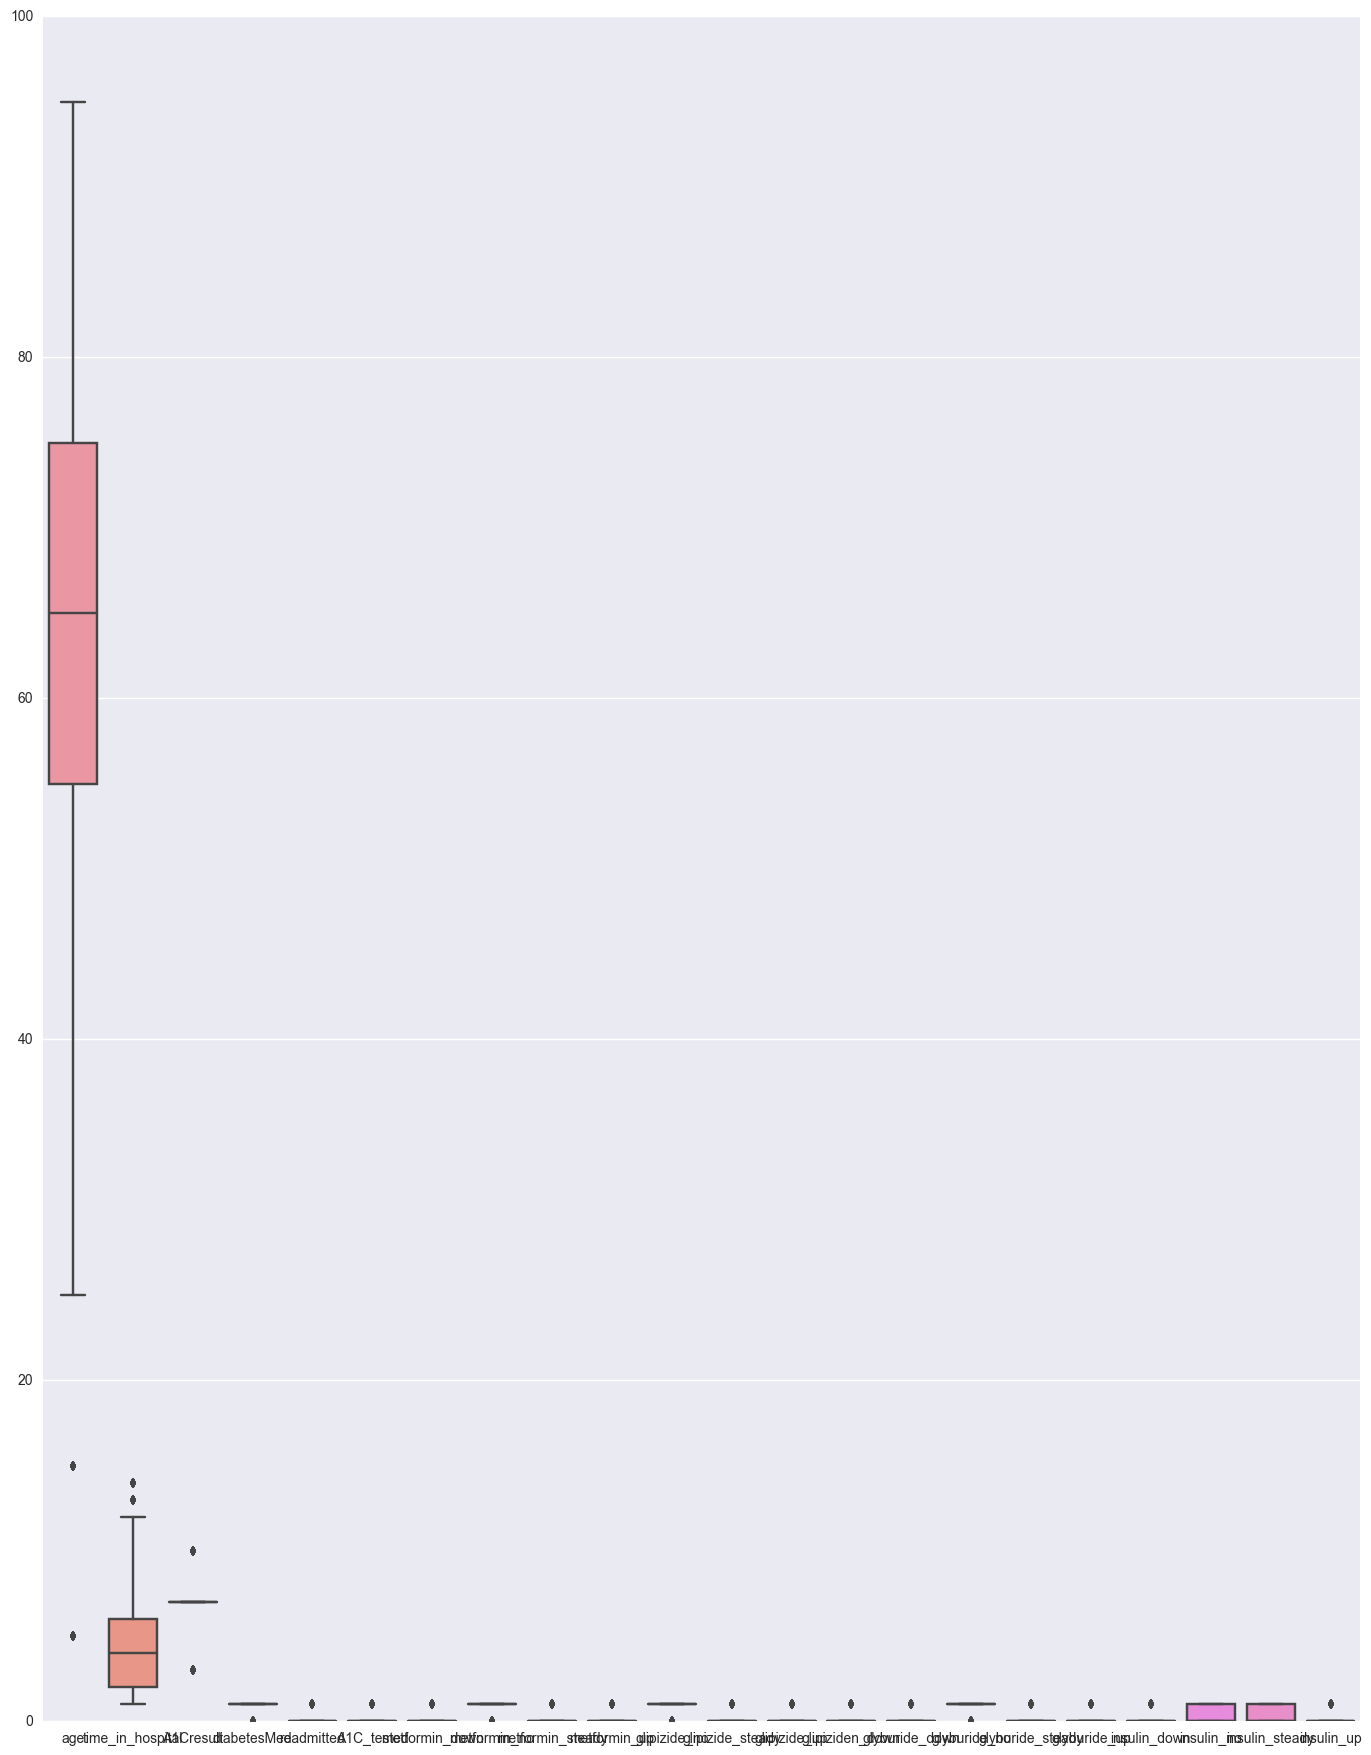

In [173]:
plt.figure(figsize=(17, 22))
g = sns.boxplot(data=diabdata_col_drop)
plt.show()

This shows a clear discrepancy in scale between the 'age' column and all the others. So to rescale:

In [174]:
scaler = StandardScaler()
diabdata_col_drop3 = pd.DataFrame(
    scaler.fit_transform(diabdata_col_drop3),
    columns = diabdata_col_drop3.columns,
    index = diabdata_col_drop3.index
)
diabdata_col_drop3.head()

,age,time_in_hospital,A1Cresult,diabetesMed,readmitted,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,-3.824600,-1.137649,-0.0375,-1.829868,-0.354426,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
1,-3.197277,-0.467653,-0.0375,0.546488,-0.354426,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
2,-2.569954,-0.802651,-0.0375,0.546488,-0.354426,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
3,-1.942632,-0.802651,-0.0375,0.546488,-0.354426,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
4,-1.315309,-1.137649,-0.0375,0.546488,-0.354426,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,1.516194,-0.353706


It will now be instructive to have a look at the heatmap of the correlation coefficients between these input features:

In [175]:
corrmat = diabdata_col_drop3.corr()

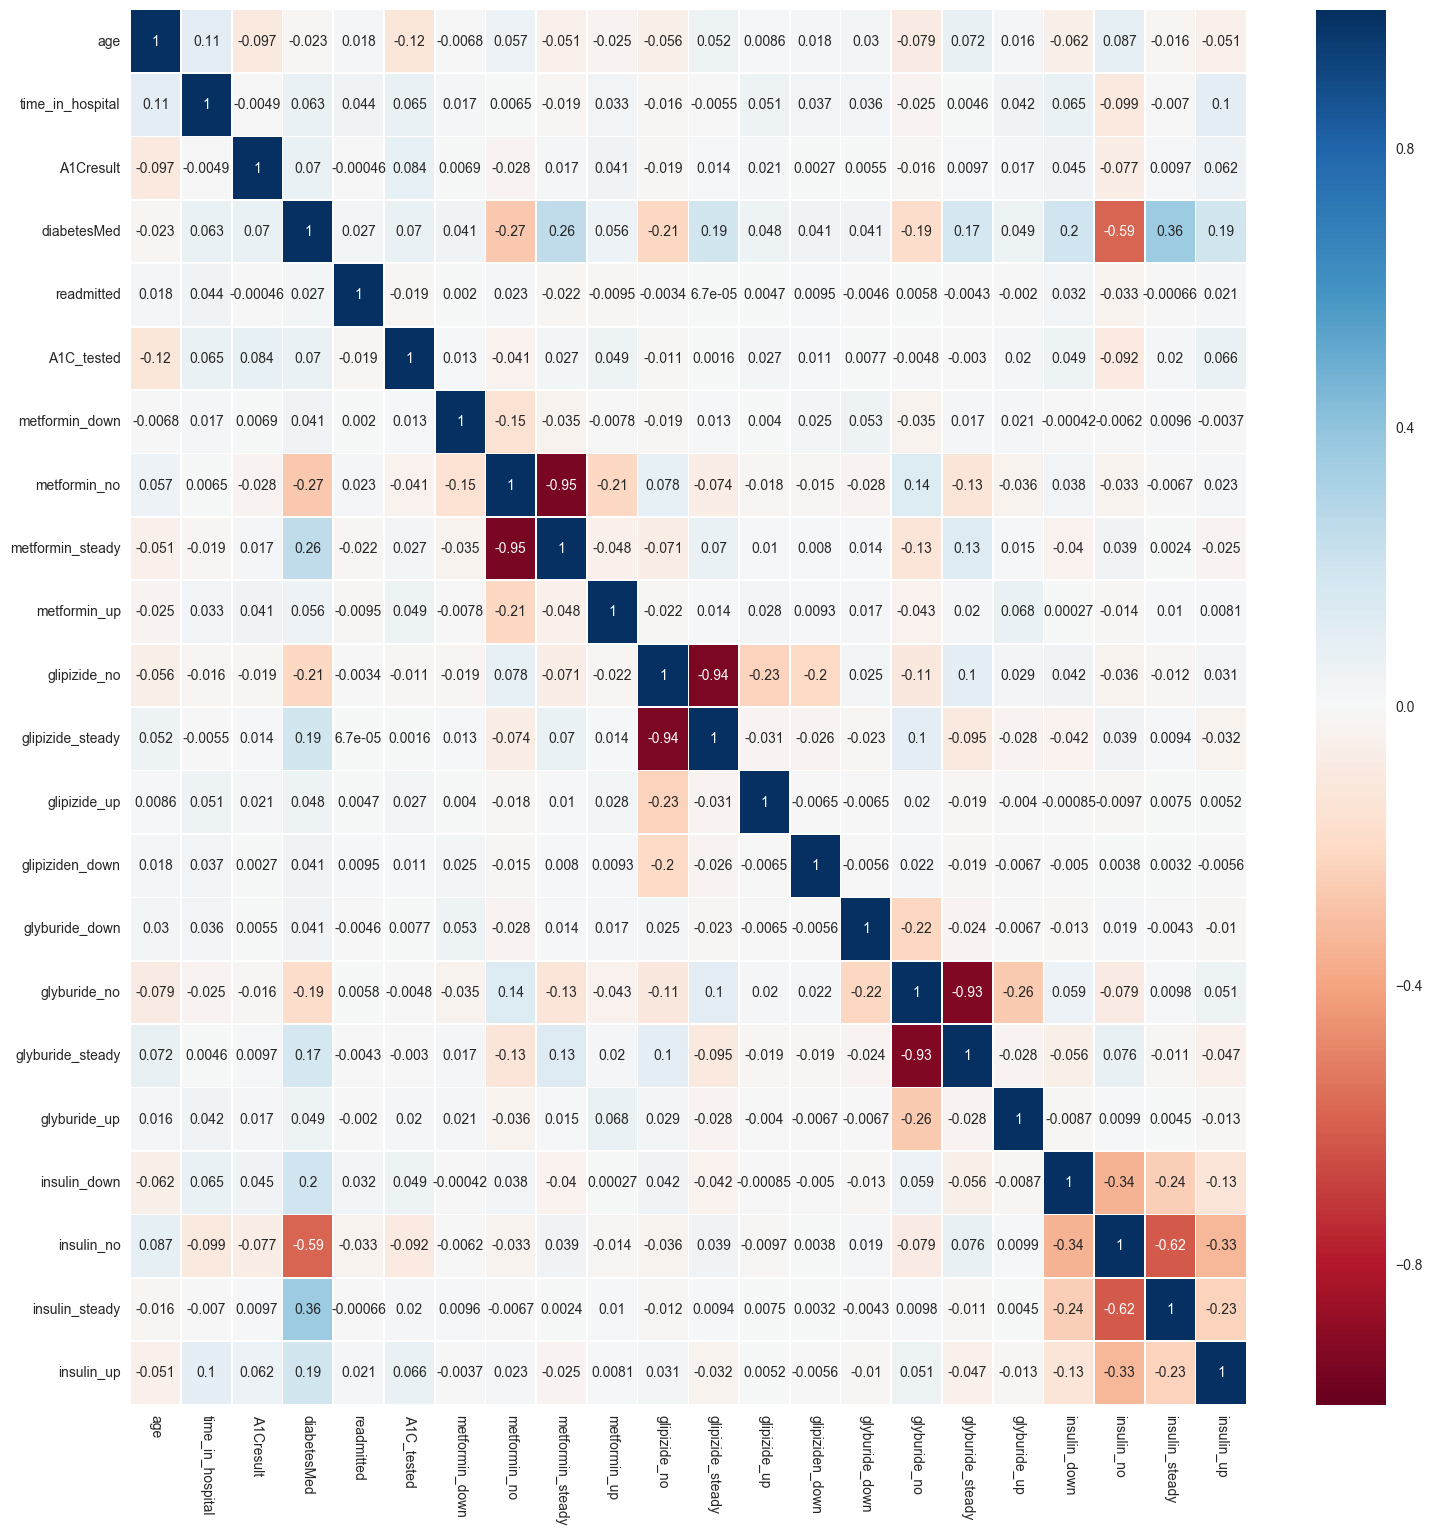

In [184]:
f, ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(corrmat, linewidths=0.5, cmap="RdBu", vmin=-1,
                 vmax=1, annot=True)

plt.xticks(rotation=270)
plt.show()

Commentary on the heatmap:

- There is negative pairwise correlation between the 'no'/'steady'/'up'/'down' inputs for each drug, as would be expected, since these are mutually exclusive.

- There is also positive correlation between diabetesMed and the 'steady'/'up'/'down' inputs for each drug and negative correlation with the 'no' inputs, as would be expected.

- Other correlations are more subtle: e.g. there is an indication that glyburide tends to be prescribed with metformin but that glyburide and glipizide tend not to be prescribed together.

- There is a positive correlation between age and time spent in hospital, as we have already noted earlier.

- There are surprising and relatively pronounced negative correlations between 'A1C_tested' and age and between 'A1Cresult' and age.

- With regards to the effect of the inputs on whether a patient is readmitted, THERE IS AN INTERESTING POSITIVE CORRELATION WITH AN INCREASE OF INSULIN ADMINISTERED AND SIMILARLY WITH A DECREASE, whereas there is no significant correlation with keeping the (non-zero) level steady.

We will now perform principal component analysis, for the following reasons:

- There is no small set of inputs that is clearly controlling the 'readmitted' value so we will require a predictive model that incorporates all or most of the inputs.

- The inputs related to the dosage of the particular drugs take only two values.  Therefore, if we are to focus on these inputs as predictors of readmission, then we need to retain all or most of the inputs: otherwise the input points are likely to collapse to identical values, thereby making cluster-creation and supervised learning difficult or impossible.

Firstly remove the 'readmitted' column:

In [186]:
diabdata_col_drop4 = diabdata_col_drop3.copy()
diabdata_col_drop4 = diabdata_col_drop4.drop(diabdata_col_drop4.columns[[4]], axis=1)
diabdata_col_drop4.head()

,age,time_in_hospital,A1Cresult,diabetesMed,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,-3.824600,-1.137649,-0.0375,-1.829868,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
1,-3.197277,-0.467653,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
2,-2.569954,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
3,-1.942632,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
4,-1.315309,-1.137649,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,1.516194,-0.353706


In [194]:
# Initialise the PCA object and create an index for each Principal Component
pca = PCA()
ind = ['PC'+str(i+1) for i in range(diabdata_col_drop4.shape[1])]
ind

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21']

In [222]:
# Create the PCA scores matrix and check the dimensionality of the PCA scores
Scores = pca.fit_transform(diabdata_col_drop4)
Scores = pd.DataFrame(Scores, columns = ind, index = diabdata_col_drop4.index)
print(Scores.shape)

(101766, 21)


In [223]:
# Create the PCA loadings matrix and check the dimensionality of the PCA loadings
print(loadings.shape)

NameError: name 'loadings' is not defined

Loadings is not defined, for a reason I cannot fathom.

In [224]:
# Calculate the explained and cumulative variance
exp_var = [i*100 for i in pca.explained_variance_ratio_]
cum_var = np.cumsum(pca.explained_variance_ratio_*100)
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=ind)
pca_var

,cum_var,exp_var
PC1,11.766002,1.176600e+01
PC2,22.373267,1.060727e+01
PC3,31.966825,9.593558e+00
PC4,39.630994,7.664168e+00
PC5,45.973723,6.342729e+00
PC6,51.445021,5.471299e+00
PC7,56.874919,5.429898e+00
PC8,62.197287,5.322367e+00
PC9,67.181570,4.984284e+00
PC10,72.054369,4.872799e+00


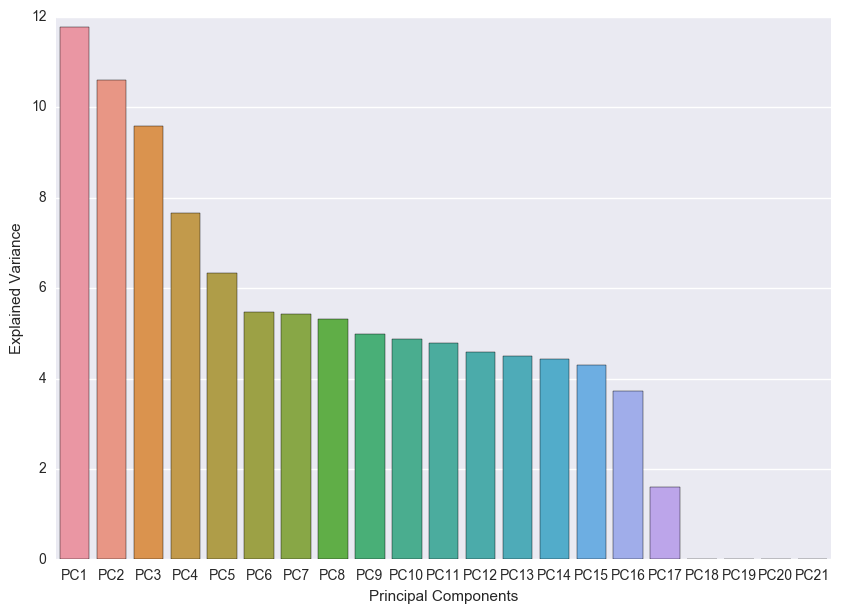

In [225]:
# Plot the explained variance per PC using a barplot
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=pca_var.index, y='exp_var', data=pca_var)
ax.set(xlabel='Principal Components',
       ylabel='Explained Variance')
plt.show()

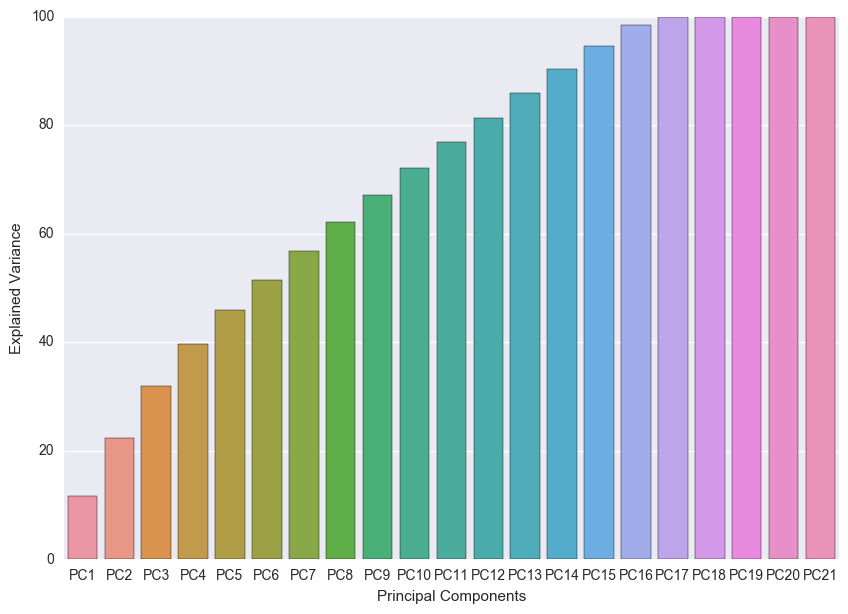

In [226]:
# Plot the cumulative variance per PC using a barplot
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Explained Variance')
plt.show()

'loadings' is not defined, as we saw earlier, so therefore we cannot obtain a heatmap, which is disappointing, as it is essential for a full understanding of how the data is working.

However, what we can see from the explained variance and cumulative variance graphs is that the data-points are scattered in an irreducibly high dimensional distribution.

We therefore cannot easily reduce the input dimensions we are using without losing a considerable amount of information.

(Note any challenges you faced when pre-processing the data and any observations of the "shape" of the data.)

## Step 3: Unsupervised Learning

Apply unsupervised learning techniques as a way of detecting trends, patterns and clusters in the data (we are interested in potential similarities and dimissimilarities in-between different groups of patients). You can choose, but not limit your selection, between the following families of algorithms:

- Centroid-based clustering
- Hierarchical clustering 
- Density-based clustering 

You can apply these algorithms prior to (raw or pre-processed data) and/or after dimensionality reduction techniques (for example, using the first two Principal Components). Report your findings using relevant visual aids. 

Hint: remember to disregard the associated labels (classes: `readmission` column) when using unsupervised learning techniques 

In view of the lowly correlated data set, it is unlikely that an clustering algorithm will be effective, so we will attempt to use the K-means algorithm (with two features) as the simplest one.  We will use the pca-transformed data.  To start with we will use only at PC1 and PC2 to create the clusters.

In [232]:
# Appy k-means with 2 clusters using a subset of features (mean_spent and max_spent)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(Scores[['PC1', 'PC2']]) 
cluster_assignment = kmeans.predict(Scores[['PC1', 'PC2']])

In [233]:
# This function generates a pairplot enhanced with the result of k-means

def pairplot_cluster(df, cols, cluster_assignment):
    """
    Input
        df, dataframe that contains the data to plot
        cols, columns to consider for the plot
        cluster_assignments, cluster asignment returned by the clustering algorithm
    """
    # seaborn will color the samples according to the column cluster
    Scores['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    Scores.drop('cluster', axis=1, inplace=True)

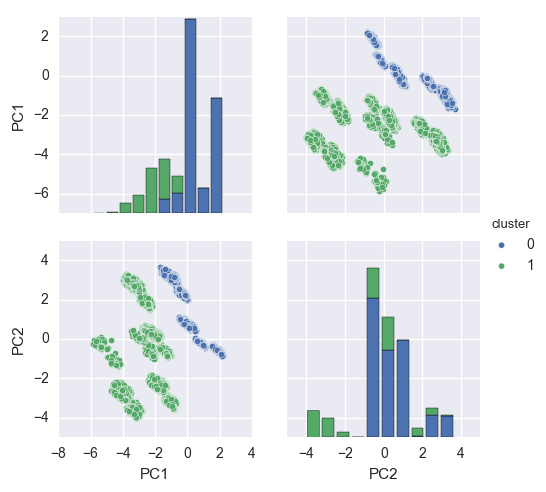

In [234]:
# Visualise the clusters using pairplot_cluster()
pairplot_cluster(Scores, ['PC1', 'PC2'], cluster_assignment)

Commentary:

The pattern generated here by the K-means algorithm is a striking one and is reminiscent of a crystal diffraction pattern.

It is difficult to interpret it without knowing the loadings matrix, but it seems that there may this may be a "projection of the vertices of a hypercube" giving rise to 16 clusters.  It may be that the PC1 and PC2 values are dependent to a large extent on the values of 4 of the original boolean inputs, which give rise to 16 clusters.  Essentially each point is positioned by the sum of up to 4 specific vectors plus a small "fuzzy factor" due to the values of the remaining inputs.

It would seem that the partition into two clusters - certainly the two that appear here - is somewhat arbitrary and a more natural clustering would be into 16, or possibly 17 clusters.


## Step 4: Supervised Learning - Train, test, optimise and evaluate

Choose at least one supervised learning algorithm to work with (it can be as simple as a KNN model or more advanced). Conduct the following with the objective of achieving good generalisation performance and minimising overfitting: 

- splitting the data into input features and outputs (associated labels); the classes in this case will be the **readmission** column. 
- investigate and visualise the ratio in-between the given classes  
- applying thorough validation to avoid overfitting
- computation of evaluation metrics associated with accuracy, such as sensitivity, specificity, precision, overall accuracy.
- optimisation of parameters based on different scoring metrics (optional).
- visualisation of model performance (optional).


We will be using the KNN model for classification, using 10-fold cross-validation to optimise the parametrisation.  The class labels are those in the 'readmitted' column: simply 0 and 1.  PCA will not be used (since it would not add value) but rather the original data set will be.

In [280]:
diabdata_col_drop5 = diabdata_col_drop4.copy()
diabdata_col_drop5.head()

,age,time_in_hospital,A1Cresult,diabetesMed,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up
0,-3.824600,-1.137649,-0.0375,-1.829868,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
1,-3.197277,-0.467653,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
2,-2.569954,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706
3,-1.942632,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208
4,-1.315309,-1.137649,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,1.516194,-0.353706


In [281]:
#obtaining 'readmitted' column from diabdata_col_drop2 to get pre-scaled integer data type required for sklearn
readmitted = diabdata_col_drop2.drop(diabdata_col_drop2.columns[[0,1,2,3,4,5,6,7,9]], axis=1)
readmitted.head()

,readmitted
0,0
1,0
2,0
3,0
4,0


In [282]:
full_dataframe = pd.concat([diabdata_col_drop5, readmitted], axis = 1)
full_dataframe.head()

,age,time_in_hospital,A1Cresult,diabetesMed,A1C_tested,metformin_down,metformin_no,metformin_steady,metformin_up,glipizide_no,glipizide_steady,glipizide_up,glipiziden_down,glyburide_down,glyburide_no,glyburide_steady,glyburide_up,insulin_down,insulin_no,insulin_steady,insulin_up,readmitted
0,-3.824600,-1.137649,-0.0375,-1.829868,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706,0
1,-3.197277,-0.467653,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208,0
2,-2.569954,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,1.071323,-0.659546,-0.353706,0
3,-1.942632,-0.802651,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,0.377374,-0.354409,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,-0.659546,2.827208,0
4,-1.315309,-1.137649,-0.0375,0.546488,-0.448115,-0.075381,0.494386,-0.46896,-0.102937,-2.649889,2.821601,-0.087316,-0.074386,-0.074653,0.341883,-0.316651,-0.089684,-0.369379,-0.933426,1.516194,-0.353706,0


Taking a sample to reduce computational overhead (full frame was taking too long):

In [285]:
sample = full_dataframe.sample(n=3000)
sample.shape

(3000, 22)

In [286]:
# Convert to numpy array and check the dimensionality
sample = np.array(sample)
X = sample[:,:-1].astype(float)
y = sample[:,-1] 
print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

('X dimensions: ', (3000L, 21L))
('y dimensions: ', (3000L,))


In [287]:
# Split the raw data into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1)

# Print the dimensionality of the individual splits
print ("XTrain dimensions: ", XTrain.shape)
print ("yTrain dimensions: ", yTrain.shape)
print ("XTest dimensions: ", XTest.shape)
print ("yTest dimensions: ", yTest.shape)

('XTrain dimensions: ', (2250L, 21L))
('yTrain dimensions: ', (2250L,))
('XTest dimensions: ', (750L, 21L))
('yTest dimensions: ', (750L,))


Experimenting manually with parameters:

In [288]:
# Build the classifier using low parameter value

knn = KNeighborsClassifier(n_neighbors=20)

# Fit to the training set

knn.fit(XTrain, yTrain)

# Predict the test data

yPredKnn = knn.predict(XTest)

# Report the final overall accuracy

print ("Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2))

('Overall Accuracy:', 0.9)


In [289]:
# Build the classifier using high parameter value

knn = KNeighborsClassifier(n_neighbors=100)

# Fit to the training set

knn.fit(XTrain, yTrain)

# Predict the test data

yPredKnn = knn.predict(XTest)

# Report the final overall accuracy

print ("Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2))

('Overall Accuracy:', 0.9)


In [290]:
# Build the classifier using very low parameter value

knn = KNeighborsClassifier(n_neighbors=5)

# Fit to the training set

knn.fit(XTrain, yTrain)

# Predict the test data

yPredKnn = knn.predict(XTest)

# Report the final overall accuracy

print ("Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2))

('Overall Accuracy:', 0.89)


Comment:

Accuracy is always at 0.9 or very near.

This is the percentage of non-readmissions (in the full dataset).

I suspect that because readmission is so poorly correlated with any of the inputs, that there is no clustering of readmissions.  Therefore the best prediction for any new encounter is non-readmission.
Any reasonably large value of k (say >10) will almost always predict non-readmission and therefore be near optimal.

So using 10-fold cross-validation:

In [291]:
# Grid search with 10-fold cross-validation using a dictionary of parameters

# Create the dictionary of given parameters
n_neighbors = np.arange(1, 101, 2)
parameters  = [{'n_neighbors': n_neighbors}]

# Optimise and build the model with GridSearchCV
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
gridCV.fit(XTrain, yTrain)

# Report the optimal parameters
bestNeighbors = gridCV.best_params_['n_neighbors']
               
print("Best parameters: n_neighbors=", bestNeighbors)

('Best parameters: n_neighbors=', 19)


In [292]:
# Build the classifier using optimal parameter

knn = KNeighborsClassifier(n_neighbors=19)

# Fit to the training set

knn.fit(XTrain, yTrain)

# Predict the test data

yPredKnn = knn.predict(XTest)

# Report the final overall accuracy

print ("Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2))

('Overall Accuracy:', 0.9)


Let's see if my suspicions are justified:

In [295]:
yPredKnn.sum()

0.0

As I thought: all the predictions are "no readmission".

The failure is not a failure of the process given the dataset input to it but rather is a consequence of the inputs not providing sufficient information to predict the outcome.

Conclusions:

- With regards to unsupervised learning, my tentative conclusion is that, for the preprocessed dataset used, there was no evidence of clustering except for that trivially produced by the prevalance of boolean-valued inputs.  Retaining a larger set of input variables may show clustering result.

- With the preprocessing decisions that were made, it seems to be unlikely that we can generate a predictive model that is more effective than the trivial "no readmission" assumption for every combination of input values. It may however be possible to increase accuracy by retaining a larger set of input variables.

- Nevertheless, the analysis process did, as I had hoped, clarify the findings in the original paper by showing a correlation of readmission with increase AND decrease of insulin medication. This would seem to merit more research to determine the reason.  That line of enquiry may lead to practical ways to reduce readmission rates.


The data used for this project is based on the diabetes data available at: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008